In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.ensemble import VotingClassifier

In [2]:
df = pd.read_csv('data/bank_data.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,34,9,180,93023,1,8.9,3,0,1,0,0,0,0
1,2,38,14,130,95010,4,4.7,3,134,1,0,0,0,0
2,3,46,21,193,91604,2,8.1,3,0,1,0,0,0,0
3,4,38,13,119,94104,1,3.3,2,0,1,0,1,1,1
4,5,42,18,141,94114,3,5.0,3,0,1,1,1,1,0


In [3]:
df.shape

(480, 14)

In [4]:
df.drop(columns=['ID', 'Experience', 'ZIP Code', 'CCAvg', 'Personal Loan'], inplace=True)
df.shape

(480, 9)

In [5]:
df.isnull().sum()

Age                   0
Income                0
Family                0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
df.describe()

,Age,Income,Family,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.00000,480.000000
mean,45.066667,144.745833,2.612500,2.233333,100.845833,0.125000,0.291667,0.60625,0.297917
std,11.590964,31.584429,1.115393,0.753373,160.847862,0.331064,0.455004,0.48909,0.457820
min,26.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,35.000000,122.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,45.000000,142.500000,3.000000,2.000000,0.000000,0.000000,0.000000,1.00000,0.000000
75%,55.000000,172.000000,4.000000,3.000000,192.500000,0.000000,1.000000,1.00000,1.000000
max,65.000000,203.000000,4.000000,3.000000,617.000000,1.000000,1.000000,1.00000,1.000000


In [7]:
df.to_csv('data/bank_data_processed.csv', index=False)
!ls data

_DS_Store
bank_data.csv
bank_data_processed.csv
concrete_data.csv


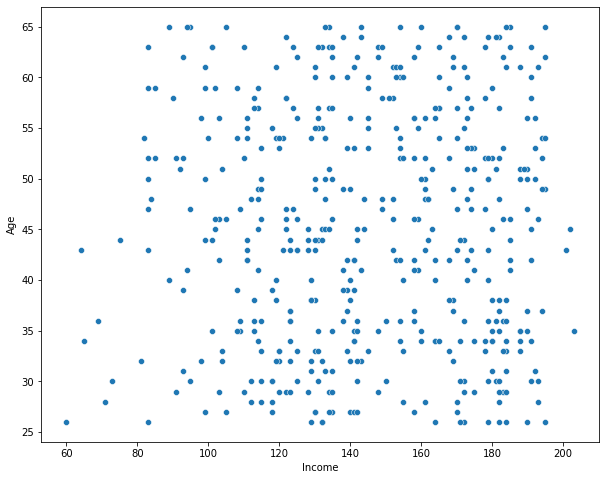

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x='Income', y='Age', data=df, ax=ax);

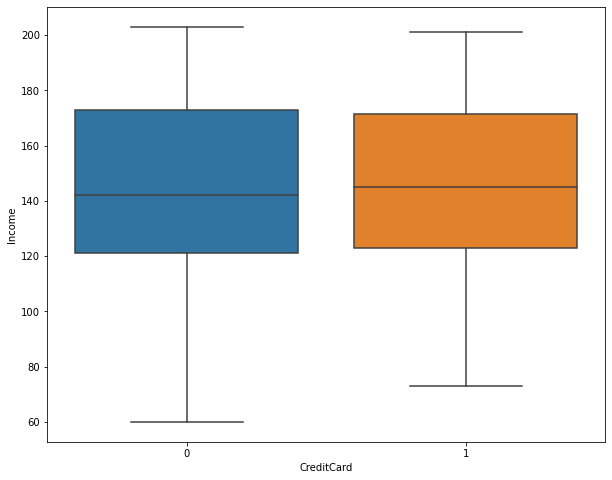

In [9]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x='CreditCard', y='Income', data=df, ax=ax);

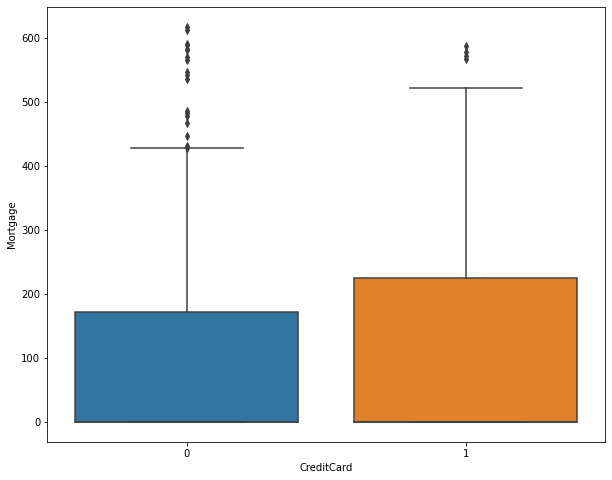

In [10]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x='CreditCard', y='Mortgage', data=df, ax=ax);

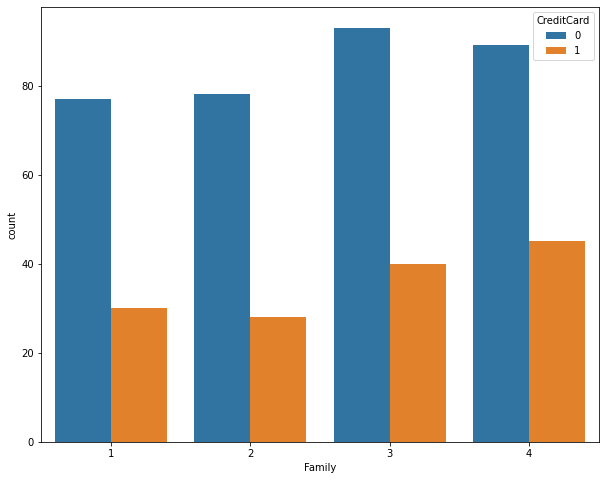

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x='Family', data=df, ax=ax, hue='CreditCard');

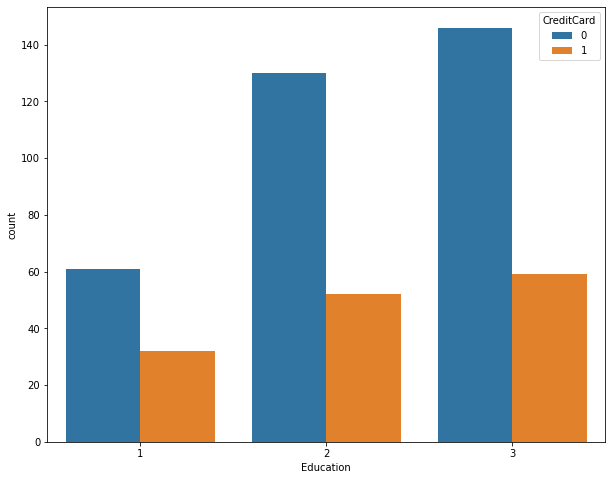

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x='Education', data=df, ax=ax, hue='CreditCard');

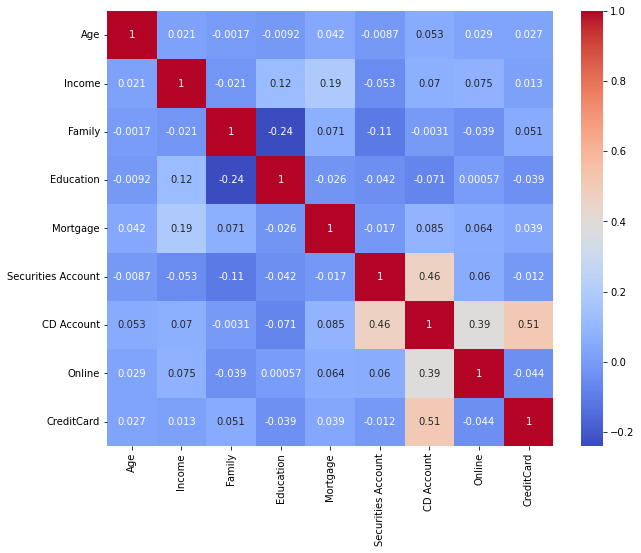

In [13]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, ax=ax, cmap='coolwarm');

In [14]:
X = df.drop(columns=['CreditCard'])
y = df['CreditCard']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((384, 8), (96, 8), (384,), (96,))

In [16]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [17]:
log_clf = LogisticRegression(C=1, solver='liblinear')
svc_clf = SVC(kernel='linear', C=1, gamma='auto')
gnb_clf = GaussianNB()

In [18]:
for clf in [log_clf, svc_clf, gnb_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9166666666666666
SVC 0.90625
GaussianNB 0.9270833333333334


In [19]:
# Hard Voting -- Majority Vote
voting_clf_hard = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('svc', svc_clf),
        ('gnb', gnb_clf)
    ],
    voting='hard'
)
voting_clf_hard.fit(X_train, y_train)
y_pred = voting_clf_hard.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9166666666666666


In [20]:
# Soft Voting -- Probability Weighted Vote
# All estimators should be able to give probability estimates
svc_clf_soft = SVC(kernel='linear', C=1, gamma='auto', probability=True)
voting_clf_soft = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('svc', svc_clf_soft),
        ('gnb', gnb_clf)
    ],
    voting='soft',
    weights=[0.4, 0.3, 0.3]
)
voting_clf_soft.fit(X_train, y_train)
y_pred = voting_clf_soft.predict(X_test)
print(accuracy_score(y_test, y_pred))


0.9166666666666666
